In [1]:
#import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#load csv file into a dataframe and preview
df = pd.read_csv('HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


# Exploratory analysis & Visualizations

In [3]:
#check the number of employees that left vs stayed
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [4]:
#preview numerical features to see the average difference between employees that left vs stayed
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [5]:
#prepare salary data for visualization
salarydata = df.groupby('left')['salary'].value_counts().reset_index(name='counts')
salarydata

,left,salary,counts
0,0,low,5144
1,0,medium,5129
2,0,high,1155
3,1,low,2172
4,1,medium,1317
5,1,high,82


Text(0.5, 1.0, 'Employee Salary Retention')

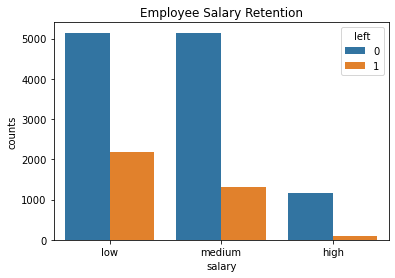

In [6]:
#visualize the impact of salary on employee retention
sns.barplot(x = 'salary', y= 'counts',hue='left',data=salarydata)
plt.title('Employee Salary Retention')

In [7]:
#prepare department data for visualization
deptdata = df.groupby('left')['Department'].value_counts().reset_index(name='counts')
deptdata

,left,Department,counts
0,0,sales,3126
1,0,technical,2023
2,0,support,1674
3,0,IT,954
4,0,product_mng,704
5,0,RandD,666
6,0,marketing,655
7,0,accounting,563
8,0,management,539
9,0,hr,524


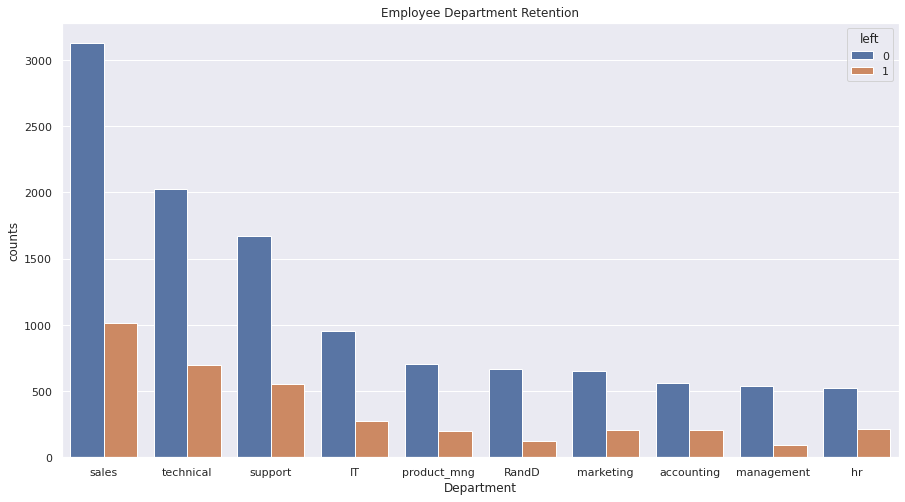

In [11]:
#visualize the impact of deptartment on employee retention
sns.barplot(x = 'Department', y= 'counts',hue='left',data=deptdata)
plt.title('Employee Department Retention')
sns.set(rc = {'figure.figsize':(10,8)})

## Feature selection and preperation

In [12]:
#select the features of interest based on exploratory analysis
features = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
features

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low
...,...,...,...,...
14994,0.40,151,0,low
14995,0.37,160,0,low
14996,0.37,143,0,low
14997,0.11,280,0,low


In [13]:
#one hot encode the categorical variables into numerical for machine learning
OneHotData = pd.get_dummies(data=features)
OneHotData

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0
...,...,...,...,...,...,...
14994,0.40,151,0,0,1,0
14995,0.37,160,0,0,1,0
14996,0.37,143,0,0,1,0
14997,0.11,280,0,0,1,0


In [14]:
#split the dataset into 80% training and 20% testing
X_train,X_test,y_train,y_test = train_test_split(OneHotData,df['left'],test_size=0.2)

## Model building

In [15]:
#create the model
model = LogisticRegression()

In [16]:
#train the model on the training dataset
model.fit(X_train,y_train)

/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
#score the model using the testing dataset
model.score(X_test,y_test)

0.775